In [146]:
import csv
import string
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [147]:
pp_prob=pd.read_csv('./../Data/pp_prob.csv')
batsman_cluster=pd.read_csv('./../Data//batting_cluster.csv')
bowler_cluster=pd.read_csv('./../Data//bowling_cluster.csv')
cluster_prob=pd.read_csv('./../Data//cluster_prob.csv')



In [148]:
print(pp_prob.head())
print(batsman_cluster.head())
print(bowler_cluster.head())
print(cluster_prob.head())
# pp_prob.head()

          batsman         bowler        P0        P1        P2   P3        P4  \
0  A Ashish Reddy        A Nehra  0.555556  0.333333  0.000000  0.0  0.111111   
1  A Ashish Reddy       AB Dinda  0.142857  0.714286  0.000000  0.0  0.142857   
2  A Ashish Reddy     AD Mathews  0.166667  0.416667  0.166667  0.0  0.083333   
3  A Ashish Reddy     AD Russell  0.000000  0.666667  0.333333  0.0  0.000000   
4  A Ashish Reddy  Anureet Singh  0.000000  1.000000  0.000000  0.0  0.000000   

         P6  p_not_out  
0  0.000000   0.888889  
1  0.000000        NaN  
2  0.166667        NaN  
3  0.000000        NaN  
4  0.000000        NaN  
      player_name  cluster
0  A Ashish Reddy        2
1        A Chopra        7
2     A Choudhary        7
3      A Flintoff        7
4        A Kumble        7
      player_name  cluster
0  A Ashish Reddy        4
1      A Chandila        4
2     A Choudhary        0
3      A Flintoff        0
4        A Kumble        2
   batsman_cluster  bowler_cluster    P

In [149]:
def pro_fun(batsman,bowler):
    a=pp_prob[(pp_prob.batsman == batsman) & (pp_prob.bowler == bowler)]
    prob=[]
    flag=0
    x=a.empty is True
    if(a.empty is False):
        for i in a.values[0][2:]:
            prob.append(i)
        if(np.isnan(prob[-1])):
            flag=1
    if((flag==1) | (a.empty is True)):
        b=batsman_cluster[batsman_cluster.player_name==batsman]
        if(b.empty is False):
            batsman_cluster_no=b.values[0][1]
        else:
            batsman_cluster_no=random.randint(0,9)
        c=bowler_cluster[bowler_cluster.player_name==bowler]
        if(c.empty is False):
            bowler_cluster_no=c.values[0][1]
        else:
            bowler_cluster_no=random.randint(0,6)
        d=cluster_prob[(cluster_prob.bowler_cluster==bowler_cluster_no) & (cluster_prob.batsman_cluster==batsman_cluster_no)]
        if(flag==1):
            prob[-1]=d.values[0][-1]
        else:
            for i in d.values[0][2:]:
                prob.append(i)
    return prob
              
    

In [150]:
#innings1
def predict_score(t1bat,t2bat,t1bowl,t2bowl,output):
    bat=1
    batsmen=[0,1]
    innings1_run=[]
    innings1_wicket=[]
    score=[0,0]
    wickets=[0,0]
    overs=[0.0,0.0]
    prob={}
    flag=0
    for i in range(20):
        bowler= t2bowl[i]
        if(flag==1):
            break
        for j in range(6):
            if(flag==1):
                break
            bat_bowl = (t1bat[batsmen[0]],bowler)
            val = pro_fun(bat_bowl[0],bat_bowl[1])
            runs_prob = val[:6]
            cum_prob=0
            run=0
            if(bat_bowl[0] not in prob.keys()):
                prob[bat_bowl[0]]=val[-1]
            else:
                prob[bat_bowl[0]]*=val[-1]
            if(prob[bat_bowl[0]] < 0.05):
                wickets[0]+=1
                innings1_run.append(0)
                innings1_wicket.append((i*6)+j+1)
                if(wickets[0]==10):
                    flag=1
                    overs[0]=i+((j+1)*0.1)
                bat+=1
                batsmen[0]=bat

            else:
                rand=random.random()
                for y in range(6):
                    cum_prob+=runs_prob[y]
                    if(cum_prob > rand):
                        if(y==5):
                            run=6
                        else:
                            run=y
                        break
                innings1_run.append(run)
                score[0]+=run
                if(run==1 or run == 3):
                    batsmen[0],batsmen[1]=batsmen[1],batsmen[0]
            overs[0]=i+((j+1)*0.1)
            

        batsmen[0],batsmen[1]=batsmen[1],batsmen[0]

    #innings2
    bat=1
    batsmen=[0,1]
    innings2_run=[]
    innings2_wicket=[]
    wickets[1]=0
    score[1]=0
    flag=0
    prob1={}
    for i in range(20):
        bowler= t1bowl[i]
        if(flag==1):
            break
        for j in range(6):
            if(flag==1):
                break
            bat_bowl = (t2bat[batsmen[0]],bowler)
            val = pro_fun(bat_bowl[0],bat_bowl[1])
            runs_prob = val[:6]
            cum_prob=0
            run=0
            if(bat_bowl[0] not in prob1.keys()):
                prob1[bat_bowl[0]]=val[-1]
            else:
                prob1[bat_bowl[0]]*=val[-1]
            if(prob1[bat_bowl[0]] < 0.05):
                wickets[1]+=1
                innings2_run.append(0)
                innings2_wicket.append((i*6)+j+1)
                if(wickets[1]==10):
                    flag=1
                    overs[1]=i+((j+1)*0.1)
                bat+=1
                batsmen[0]=bat

            else:
                rand=random.random()
                for y in range(6):
                    cum_prob+=runs_prob[y]
                    if(cum_prob > rand):
                        if(y==5):
                            run=6
                        else:
                            run=y
                        break
                innings2_run.append(run)
                score[1]+=run
                if(score[1]>score[0]):
                    flag=1
                if(run==1 or run == 3):
                    batsmen[0],batsmen[1]=batsmen[1],batsmen[0]
            overs[1]=i+((j+1)*0.1)

        batsmen[0],batsmen[1]=batsmen[1],batsmen[0]
    if(output=="print_score"):
        print('Innings 1 ')
        print('Score / wicket / overs')
        print(score[0],'/',wickets[0] ,'/',overs[0])

        print('Innings 2 ')
        print('Score / wicket','overs')
        print(score[1],'/',wickets[1],'/',overs[1])
    elif(output=="Winner"):
        print(overs[0],overs[1])
        if(score[0]>score[1]):
            return [0,score[0],score[1]]
        else:
            return [1,score[0],score[1]]

In [170]:
#match 57
t1bat=['AJ Finch','BB McCullum','SK Raina ', 'KD Karthik', 'DR Smith', 'RA Jadeja', 'DJ Bravo', 'ER Dwivedi', 'P Kumar', 'DS Kulkarni','SB Jakati']
t2bat=['CH Gayle', 'V Kohli', 'AB de Villiers', 'KL Rahul', 'SR Watson', 'Sachin Baby', 'STR Binny', 'Iqbal Abdulla', 'CJ Jordan', 'S Aravind', 'YS Chahal']
t1bowl=['P Kumar', 'DS Kulkarni', 'P Kumar', 'DS Kulkarni', 'RA Jadeja', 'DS Kulkarni', 'RA Jadeja', 'DS Kulkarni', 'SB Jakati', 'RA Jadeja', 'SB Jakati', 'DJ Bravo', 'RA Jadeja', 'DJ Bravo', 'DR Smith', 'SB Jakati', 'P Kumar', 'DJ Bravo', 'P Kumar', 'DJ Bravo']
t2bowl=['S Aravind', 'Iqbal Abdulla', 'S Aravind', 'SR Watson', 'Iqbal Abdulla', 'SR Watson', 'CJ Jordan', 'YS Chahal', 'STR Binny', 'YS Chahal', 'Iqbal Abdulla', 'YS Chahal', 'Iqbal Abdulla', 'CJ Jordan', 'S Aravind', 'SR Watson', 'YS Chahal', 'CJ Jordan', 'SR Watson', 'CJ Jordan']
print(len(t1bat),len(t2bat),len(t1bowl),len(t2bowl))

11 11 20 20


In [171]:
predict_score(t1bat,t2bat,t1bowl,t2bowl,"Winner")

19.6 19.6


[0, 168, 135]

In [158]:
#actual win team 0
#actual score (171,149)
# score_pred=[]
# win_prediction=[]
# for i in range(20):
#     a=predict_score(t1bat,t2bat,t1bowl,t2bowl,"Winner")
#     win_prediction.append(a[0])
#     score_pred.append((a[1],a[2]))
# print(win_prediction)
# print(score_pred)

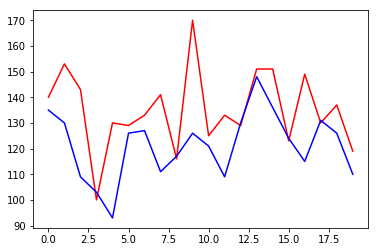

In [173]:
plt.plot([x for x in range(20)],[score_pred[i][0] for i in range(20)],'r',[x for x in range(20)],[score_pred[i][1] for i in range(20)],'b')
